# Papua New Guinea case study

- BLM calibration (There is no grid)
- Solutions clustering
- Gap Analysis
- Unmet targtes pipeline
- FPF calibration (Targets met)
- Difference Map (There is no grid)

Date: 20 April 2021  
Author: tamara.huete@vizzuality.com

### 1. Requirements

In [29]:
%run marxan_utils.ipynb

### 2. MARXAN folder

In [21]:
MARXAN_FOLDER = '/home/jovyan/work/datasets/raw/demo_Papua_New_Guinea/marxan_Papua_New_Guinea'
MARXAN_INPUTDATA = 'input.dat'

### 3. BLM calibration (no grid file, can't calculate area to apply rule of thumb)

In [ ]:
grid_file_path = f'{MARXAN_FOLDER}/pulayer/pu_base.shp'
BLM_calibration(MARXAN_FOLDER,'input.dat',grid_file_path )

In [ ]:
plotClumping(MARXAN_FOLDER,'input.dat',grid_file_path)

## Execute marxan

In [26]:
#execute marxan
userInputFile = readInput(MARXAN_FOLDER, MARXAN_INPUTDATA)
userInputFile.VERBOSITY = 3
saveInput(MARXAN_FOLDER, MARXAN_INPUTDATA,userInputFile)

In [ ]:
execute_marxan(MARXAN_FOLDER) ### Runs with the old algorithm but fails with the new one

### SCENARIO OUTPUTS

### 3) Solutions clustering

In [31]:
bestsols= clusterSolutions(MARXAN_FOLDER,'input.dat',k=5)
bestsols

Overall best solution is 1


[1, 7, 8, 3, 10]

#### Summary info 5 most different solutions

In [32]:
summary = validateFile(MARXAN_FOLDER,'input.dat',OutputSum)
sum_diff =summary[summary['Run_Number'].isin(bestsols)]
sum_diff

,Run_Number,Score,Cost,Planning_Units,Connectivity,Connectivity_Total,Connectivity_In,Connectivity_Edge,Connectivity_Out,Connectivity_In_Fraction,Penalty,Shortfall,Missing_Values,MPM
0,1,2.224783e+08,1.296565e+08,5114,22902301.0,664787887.0,55640321.0,22902301.0,586245265.0,0.083696,67488.541940,6342.385499,0,0.997146
2,3,2.278626e+08,1.349057e+08,5107,22937386.0,664787887.0,55482389.0,22937386.0,586368112.0,0.083459,60452.963580,133286.909344,0,0.995972
6,7,2.286940e+08,1.297862e+08,5071,24404852.0,664787887.0,54341769.0,24404852.0,586041266.0,0.081743,68116.993347,4902.865259,0,0.996330
7,8,2.249302e+08,1.313776e+08,5097,23095334.0,664787887.0,55355166.0,23095334.0,586337387.0,0.083267,16510.255353,52284.840733,0,0.999915
9,10,2.285567e+08,1.317815e+08,5110,23893771.0,664787887.0,55148977.0,23893771.0,585745139.0,0.082957,5392.868049,45833.407325,0,0.999675


### 4) Gap Analysis

In [33]:
df = gapAnalysis(MARXAN_FOLDER, 'input.dat')

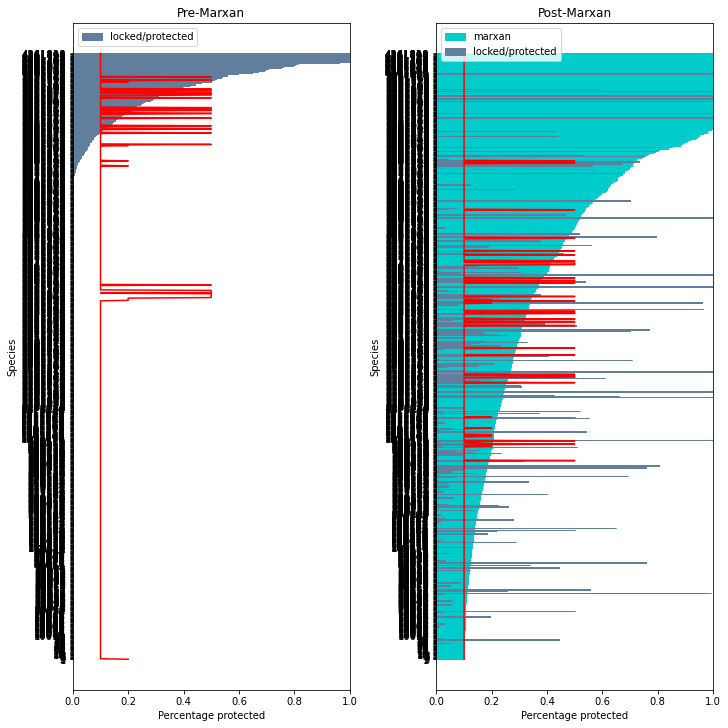

In [34]:
fig, anx = plt.subplots(nrows=1, ncols=2,figsize=(10,10), constrained_layout=True)
plotGap(df, 'Pre-Marxan', anx[0], post_marxan=False)
plotGap(df, 'Post-Marxan', anx[1], post_marxan=True)

### 5) Unmet targets pipeline

In [35]:
unmetDecisionTree(MARXAN_FOLDER, 'input.dat',
                      lock_out_limit=50, 
                      high_cost_quantile= 0.7, 
                      hcost_limit=20)

{'None': 'All targets met'}